In [1]:
import os,sys,string, time
import ROOT
from math import *
from ROOT import gPad, TTree, TObject, TFile, gDirectory, TH1D, TH2D, TH3D, TCanvas, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain, TLatex, TText, TCollection, kRed, kBlue
from array import array
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
from matplotlib.patches import Rectangle
from particle import Particle

import Utilities.Functions as Functions
import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Variables
from Utilities.ipython_exit import exit

print ('Success')


Welcome to JupyROOT 6.24/06
Success


# Purpose
The purpose of this script is to look at the kinematics of the various samples before and after selections. It should be able to inform decisions made in the full analysis chain. 

The kinematics vary signficantly between different masses of HNL, this script should make plots which give insight into those differences.

# Reading in .pkl files

In [2]:
Run = "run1" #so far either "run1" or "run3"

load_lepton_signal = False
load_pi0_signal = True

FLATTEN = False #Mostly put as False

print(f"Loading {Run} files")

loc_pkls = f"../new_scalings/negwt_fix/"

signal_samples_dict = {}

# HNL_masses = [100, 150, 180, 200, 220]
HNL_masses = Constants.HNL_mass_samples
variables = "*"

if load_lepton_signal == True:
    for HNL_mass in HNL_masses:
        # signal_from_pkl = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_{Run}_{variables_string}_{Flat_state}_New_gen.pkl")
        uproot_file = uproot3.open(loc_pkls+f"{HNL_mass}MeV_ee_fhc_majorana_negwt_fix.root")["generator/event_tree"]
        df_signal = uproot_file.pandas.df(variables, flatten=FLATTEN)
        signal_samples_dict[HNL_mass] = df_signal
        print(f"{HNL_mass}MeV Signal is "+str(len(signal_samples_dict[HNL_mass]))+" entries long.")
    
if load_pi0_signal == True:
    pi0_signal_samples_dict = {}
    loc_pkls = f"../new_scalings/negwt_fix/"
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        # uproot_file = uproot3.open(loc_pkls+f"{HNL_mass}MeV_pi0_fhc_majorana_fixed.root")["generator/event_tree"]
        uproot_file = uproot3.open(loc_pkls+f"{HNL_mass}MeV_pi0_fhc_majorana_negwt_fix.root")["generator/event_tree"]
        df_signal = uproot_file.pandas.df(variables, flatten=FLATTEN)
        signal_samples_dict[HNL_mass] = df_signal
        print(f"{HNL_mass}MeV pi0 signal is "+str(len(signal_samples_dict[HNL_mass]))+" entries long.")
        
print(f"Successfully loaded {Run} weighted files")

Loading run1 files
150MeV pi0 signal is 50000 entries long.
180MeV pi0 signal is 50000 entries long.
200MeV pi0 signal is 50000 entries long.
220MeV pi0 signal is 50000 entries long.
240MeV pi0 signal is 50000 entries long.
245MeV pi0 signal is 50000 entries long.
Successfully loaded run1 weighted files


In [3]:
signal_samples_dict[150].keys()

Index(['kaon_mom_x', 'kaon_mom_y', 'kaon_mom_z', 'kaon_energy', 'kaon_decay_x',
       'kaon_decay_y', 'kaon_decay_z', 'kaon_decay_t', 'hnl_mom_x',
       'hnl_mom_y', 'hnl_mom_z', 'hnl_energy', 'hnl_decay_x', 'hnl_decay_y',
       'hnl_decay_z', 'hnl_decay_t', 'daughter1_mom_x', 'daughter1_mom_y',
       'daughter1_mom_z', 'daughter1_energy', 'daughter2_mom_x',
       'daughter2_mom_y', 'daughter2_mom_z', 'daughter2_energy', 'weight',
       'flux_weight', 'decay_weight', 'branching_ratio_weight', 'selected',
       'kaon_pdg', 'daughter1_pdg', 'daughter2_pdg'],
      dtype='object')

In [5]:
signal_samples_dict[150]['daughter1_pdg'].head(20)


entry
0     111
1     111
2     111
3     111
4     111
5     111
6     111
7     111
8     111
9     111
10    111
11    111
12    111
13    111
14    111
15    111
16    111
17    111
18    111
19    111
Name: daughter1_pdg, dtype: int32

In [ ]:
eleven = Particle.from_pdgid(11)
twelve = Particle.from_pdgid(12)
thirteen = Particle.from_pdgid(13)
fourteen = Particle.from_pdgid(14)
one_one_one = Particle.from_pdgid(111)

print("eleven is " + str(eleven))
print("twelve is " + str(twelve))
print("thirteen is " + str(thirteen))
print("fourteen is " + str(fourteen))
print(one_one_one)

In [7]:
FLATTEN = True

flat_samples_dict = {}

#Loading files for filtering ee events
if load_lepton_signal == True:
    for HNL_mass in HNL_masses:
        uproot_file = uproot3.open(loc_pkls+f"{HNL_mass}MeV_ee_fhc_majorana_negwt_fix.root")["generator/event_tree"]
        df_signal = uproot_file.pandas.df(variables, flatten=FLATTEN)
        flat_samples_dict[HNL_mass] = df_signal
        print(f"FLAT {HNL_mass}MeV Signal is "+str(len(flat_samples_dict[HNL_mass]))+" entries long.")
    
if load_pi0_signal == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        # uproot_file = uproot3.open(loc_pkls+f"{HNL_mass}MeV_pi0_fhc_majorana_fixed.root")["generator/event_tree"]
        uproot_file = uproot3.open(loc_pkls+f"{HNL_mass}MeV_pi0_fhc_majorana_negwt_fix.root")["generator/event_tree"]
        df_signal = uproot_file.pandas.df(variables, flatten=FLATTEN)
        flat_samples_dict[HNL_mass] = df_signal
        print(f"FLAT {HNL_mass}MeV Signal is "+str(len(flat_samples_dict[HNL_mass]))+" entries long.")
        

FLAT 150MeV Signal is 50000 entries long.
FLAT 180MeV Signal is 50000 entries long.
FLAT 200MeV Signal is 50000 entries long.
FLAT 220MeV Signal is 50000 entries long.
FLAT 240MeV Signal is 50000 entries long.
FLAT 245MeV Signal is 50000 entries long.


In [ ]:
# signal_samples_dict[150].keys()
flat_samples_dict[150].head()

In [8]:
for HNL_mass in flat_samples_dict:
    # print(flat_samples_dict[HNL_mass].index.values)
    # print(flat_samples_dict[HNL_mass].entry())
    flat_samples_dict[HNL_mass]["rse_id"] = flat_samples_dict[HNL_mass].index.values

In [6]:
flat_samples_dict[150].head()

,kaon_mom_x,kaon_mom_y,kaon_mom_z,kaon_energy,kaon_decay_x,kaon_decay_y,kaon_decay_z,kaon_decay_t,hnl_mom_x,hnl_mom_y,...,daughter2_energy,weight,flux_weight,decay_weight,branching_ratio_weight,selected,kaon_pdg,daughter1_pdg,daughter2_pdg,rse_id
entry,,,,,,,,,,,,,,,,,,,,,
0,0.0,-0.0,0.0,0.493677,-3162.648679,-7614.863499,6589.746340,14185.799273,0.069262,0.157233,...,0.011771,7.684883e-316,5.928788e-323,3.500618e+151,9.534792e-307,True,321,111,12,0
1,0.0,0.0,0.0,0.493677,-3053.158590,-7550.876682,6826.941596,11943.812715,0.067013,0.156495,...,0.080091,7.684883e-316,5.928788e-323,3.500618e+151,9.534792e-307,True,321,-11,11,1
2,0.0,-0.0,0.0,0.493677,-3161.559471,-7619.981088,6496.891143,12999.960558,0.068643,0.154582,...,0.032331,7.684883e-316,5.928788e-323,3.500618e+151,9.534792e-307,True,321,111,12,2
3,0.0,0.0,0.0,0.493677,-3217.341162,-7593.251632,6545.488040,10665.541541,0.070110,0.158483,...,0.025555,7.684883e-316,5.928788e-323,3.500618e+151,9.534792e-307,True,321,111,12,3
4,-0.0,0.0,0.0,0.493677,-3167.335846,-7617.144257,6682.592714,14243.883414,0.069557,0.155713,...,0.163390,7.684883e-316,5.928788e-323,3.500618e+151,9.534792e-307,True,321,-11,13,4


## Remove e, mu, nu events

In [ ]:
#Make rse_id
# for HNL_mass in signal_samples_dict:
#     signal_samples_dict[HNL_mass] = Functions.make_unique_ev_id(signal_samples_dict[HNL_mass])
#     flat_samples_dict[HNL_mass] = Functions.make_unique_ev_id(flat_samples_dict[HNL_mass])


In [ ]:
flat_samples_dict[245]["daughter2_pdg"].head(20)

In [ ]:
flat_samples_dict[245]["daughter1_pdg"].head(20)

In [9]:
#need pdgs of minus 11 and 11. 
e_e_evs = {}
mu_e_evs = {}
mu_plus_e_evs = {}
mu_mu_evs = {}
mu_nu_mu_bar_evs = {}
electrons_dict = {}
positrons_dict = {}

pi0_dict = {}
nu_dict = {}
nu_pi0_evs = {}

if load_lepton_signal == True:
    for HNL_mass in signal_samples_dict:
        print(f"Original length is of {HNL_mass}MeV " + str(len(flat_samples_dict[HNL_mass])))
        positron = flat_samples_dict[HNL_mass].query("daughter1_pdg==-11")
        elec = flat_samples_dict[HNL_mass].query("daughter2_pdg==11")
        
        mu = flat_samples_dict[HNL_mass].query("daughter2_pdg==13")
        mu_bar = flat_samples_dict[HNL_mass].query("daughter1_pdg==-13 or daughter2_pdg==-13")
        nu_mu_bar = flat_samples_dict[HNL_mass].query("daughter1_pdg==-14")

        e_e = Functions.make_common_evs_df([elec, positron])
        mu_e = Functions.make_common_evs_df([positron, mu])
        mu_plus_e = Functions.make_common_evs_df([mu_bar, elec])
        mu_mu = Functions.make_common_evs_df([mu, mu_bar])
        mu_nu_mu_bar = Functions.make_common_evs_df([mu_bar, nu_mu_bar])
        # mu_mu = Functions.make_common_evs_df([mu, mu_bar, nu_mu_bar])
        
        e_e_evs[HNL_mass]=e_e
        mu_e_evs[HNL_mass]=mu_e
        mu_plus_e_evs[HNL_mass]=mu_plus_e
        mu_mu_evs[HNL_mass]=mu_mu
        mu_nu_mu_bar_evs[HNL_mass]=mu_nu_mu_bar
        # print("Num ee decays is " + str(len(common_evs[HNL_mass])*2))
    
if load_pi0_signal == True: 
    for HNL_mass in signal_samples_dict:
        print(f"Original length is of FLAT {HNL_mass}MeV " + str(len(flat_samples_dict[HNL_mass])))
        print(f"Original length is of {HNL_mass}MeV " + str(len(signal_samples_dict[HNL_mass])))
        pi0 = flat_samples_dict[HNL_mass].query("daughter1_pdg==111")
        nu = flat_samples_dict[HNL_mass].query("daughter2_pdg==-12 or daughter2_pdg==12")
        
        positron = flat_samples_dict[HNL_mass].query("daughter1_pdg==-11")
        elec = flat_samples_dict[HNL_mass].query("daughter2_pdg==11") 
        
        mu = flat_samples_dict[HNL_mass].query("daughter2_pdg==13")
        mu_bar = flat_samples_dict[HNL_mass].query("daughter1_pdg==-13 or daughter2_pdg==-13")
        
        pi0_dict[HNL_mass] = pi0
        nu_dict[HNL_mass] = nu

        e_e = Functions.make_common_evs_df([elec, positron])
        common = Functions.make_common_evs_df([pi0, nu])
        e_mu = Functions.make_common_evs_df([positron, mu])
        mu_mu = Functions.make_common_evs_df([mu, mu_bar])
        nu_pi0_evs[HNL_mass]=common
        e_e_evs[HNL_mass]=e_e
        mu_e_evs[HNL_mass] = e_mu
        mu_mu_evs[HNL_mass] = mu_mu

        print("Num pi0 decays is " + str(len(nu_pi0_evs[HNL_mass])))

Original length is of FLAT 150MeV 50000
Original length is of 150MeV 50000
Length is of common events list is 0
Length is of common events list is 50000
Length is of common events list is 0
Length is of common events list is 0
Num pi0 decays is 50000
Original length is of FLAT 180MeV 50000
Original length is of 180MeV 50000
Length is of common events list is 0
Length is of common events list is 50000
Length is of common events list is 0
Length is of common events list is 0
Num pi0 decays is 50000
Original length is of FLAT 200MeV 50000
Original length is of 200MeV 50000
Length is of common events list is 0
Length is of common events list is 50000
Length is of common events list is 0
Length is of common events list is 0
Num pi0 decays is 50000
Original length is of FLAT 220MeV 50000
Original length is of 220MeV 50000
Length is of common events list is 0
Length is of common events list is 50000
Length is of common events list is 0
Length is of common events list is 0
Num pi0 decays is 50

In [32]:
frac_ee, frac_mumu, frac_emu = {}, {}, {}
frac_all_mus, frac_all_emus = {}, {}
if load_lepton_signal == True:
    for HNL_mass in signal_samples_dict:
        frac_ee[HNL_mass] = len(e_e_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_mumu[HNL_mass] = len(mu_mu_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_emu[HNL_mass] = len(mu_e_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_all_emus[HNL_mass] = (len(mu_e_evs[HNL_mass])+len(mu_plus_e_evs[HNL_mass]))/len(signal_samples_dict[HNL_mass])
        frac_all_mus[HNL_mass] = (len(mu_mu_evs[HNL_mass])+len(mu_nu_mu_bar_evs[HNL_mass]))/len(signal_samples_dict[HNL_mass])
        
        print(f"{HNL_mass} emu frac is " + str(frac_all_emus[HNL_mass]))

frac_nu_pi0 = {}
frac_nu_pi0_plus_emu = {}
frac_nu_pi0_emu_ee = {}
if load_pi0_signal == True:
    for HNL_mass in signal_samples_dict:
        frac_nu_pi0[HNL_mass] = len(nu_pi0_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_ee[HNL_mass] = len(e_e_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_emu[HNL_mass] = len(mu_e_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_mumu[HNL_mass] = len(mu_mu_evs[HNL_mass])/len(signal_samples_dict[HNL_mass])
        frac_nu_pi0_plus_emu[HNL_mass] = (len(nu_pi0_evs[HNL_mass]) + len(mu_e_evs[HNL_mass]))/len(signal_samples_dict[HNL_mass])
        frac_nu_pi0_emu_ee[HNL_mass] = (len(nu_pi0_evs[HNL_mass]) + len(mu_e_evs[HNL_mass]) + len(e_e_evs[HNL_mass]))/len(signal_samples_dict[HNL_mass])
        print(f"{HNL_mass} nu pi0 frac is " + str(frac_nu_pi0[HNL_mass]))

2 emu frac is 0.0
10 emu frac is 0.0
20 emu frac is 0.0
50 emu frac is 0.0
100 emu frac is 0.0
150 emu frac is 0.09945945945945946
180 emu frac is 0.31752786220871326
200 emu frac is 0.4303252032520325
220 emu frac is 0.5136456211812628
240 emu frac is 0.5656504065040651
245 emu frac is 0.5719756838905775


In [33]:
if load_lepton_signal == True:
    e_mu_plus_ee, mu_mu_plus_others = {}, {}
    for HNL_mass in signal_samples_dict:
        e_mu_plus_ee[HNL_mass] =  frac_ee[HNL_mass]+frac_all_emus[HNL_mass]
        
# if load_pi0_signal == True:
#     nu_pi0_plus_others = {}
#     for HNL_mass in signal_samples_dict:
#         nu_pi0_plus_others[HNL_mass] = 

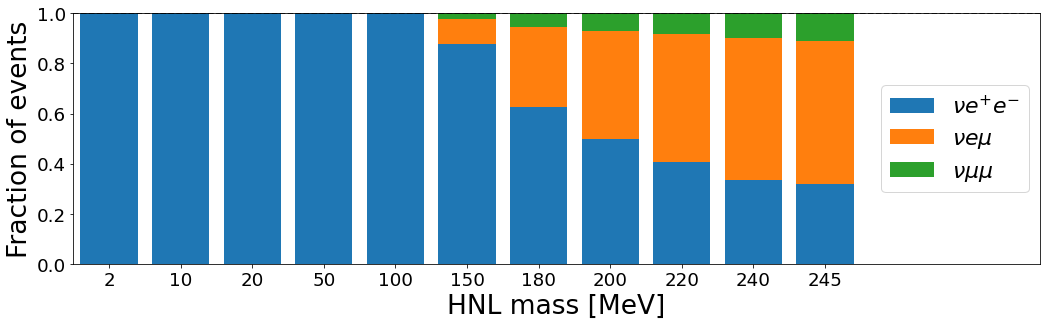

In [34]:
if load_lepton_signal == True:
    x_int_list = range(0, len(frac_ee.keys()))
    plt.bar(x_int_list, frac_ee.values(), label=r"$\nu e^{+}e^{-}$", tick_label=list(frac_ee.keys()))
    plt.bar(x_int_list, frac_all_emus.values(), label=r"$\nu e\mu$", tick_label=list(frac_ee.keys()), bottom=list(frac_ee.values()))
    plt.bar(x_int_list, frac_all_mus.values(), label=r"$\nu \mu\mu$", tick_label=list(frac_ee.keys()),bottom=list(e_mu_plus_ee.values()))

    plt.axhline(1.0,ls="--", color="black")
    plt.ylabel("Fraction of events")
    plt.xlabel("HNL mass [MeV]")
    plt.xlim(-0.5, 13)
    plt.legend(fontsize=22, loc="center right")
    plt.tight_layout()

    plt.savefig("plots/Generator/channel_fractions_negwt_fix.pdf")

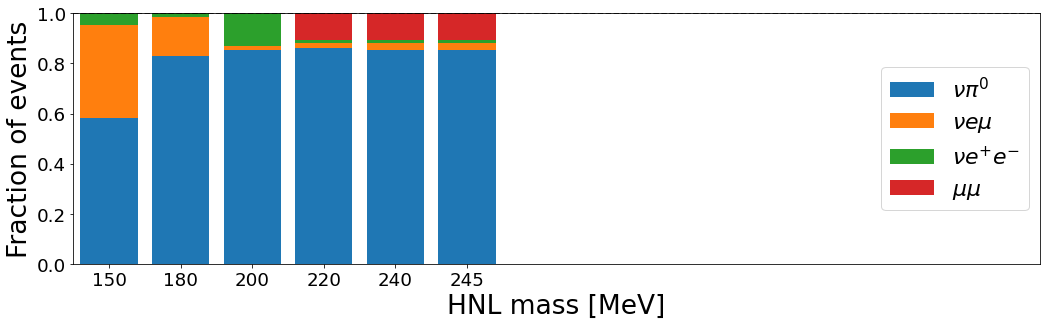

In [9]:
if load_pi0_signal == True:
    x_int_list = range(0, len(frac_nu_pi0.keys()))
    plt.bar(x_int_list, frac_nu_pi0.values(), label=r"$\nu \pi^{0}$", tick_label=list(frac_nu_pi0.keys()))
    plt.bar(x_int_list, frac_emu.values(), label=r"$\nu e\mu$", tick_label=list(frac_ee.keys()), bottom=list(frac_nu_pi0.values()))
    plt.bar(x_int_list, frac_ee.values(), label=r"$\nu e^{+}e^{-}$", tick_label=list(frac_ee.keys()), bottom=list(frac_nu_pi0_plus_emu.values()))
    plt.bar(x_int_list, frac_mumu.values(), label=r"$\mu \mu$", tick_label=list(frac_ee.keys()), bottom=list(frac_nu_pi0_emu_ee.values()))

    plt.axhline(1.0,ls="--", color="black")
    plt.ylabel("Fraction of events")
    plt.xlabel("HNL mass [MeV]")
    plt.xlim(-0.5, 13)
    plt.legend(fontsize=22, loc="center right")
    plt.tight_layout()

    plt.savefig("plots/Generator/channel_fractions_pi0_dirac_scaling_samples.pdf")

In [ ]:
e_e_evs[HNL_mass]["rse_id"].head()

In [ ]:
print(len(e_e_evs[245]))

In [10]:
filtered_dict, filtered_out_dict = {}, {}
for HNL_mass in signal_samples_dict:
    # filtered_dict[HNL_mass] = signal_samples_dict[HNL_mass].loc[(signal_samples_dict[HNL_mass]['rse_id'].isin(e_e_evs[HNL_mass]['rse_id']))]
    # filtered_out_dict[HNL_mass] = signal_samples_dict[HNL_mass].loc[(~signal_samples_dict[HNL_mass]['rse_id'].isin(e_e_evs[HNL_mass]['rse_id']))]
    filtered_dict[HNL_mass] = flat_samples_dict[HNL_mass].loc[(flat_samples_dict[HNL_mass]['rse_id'].isin(nu_pi0_evs[HNL_mass]['rse_id']))]
    filtered_out_dict[HNL_mass] = flat_samples_dict[HNL_mass].loc[(~flat_samples_dict[HNL_mass]['rse_id'].isin(nu_pi0_evs[HNL_mass]['rse_id']))]
    
print(len(filtered_out_dict[150]))

20886


In [11]:
filtered_index_dict = {}
for HNL_mass in signal_samples_dict:
    filtered_index_dict[HNL_mass] = filtered_dict[HNL_mass].index


In [ ]:
Num_evs = len(signal_samples_dict[2])
print(Num_evs)
entries = np.arange(0, Num_evs,1)
print(entries)

## Creating new variables

In [ ]:
print(signal_samples_dict[150]['mc_E'][0][0]/signal_samples_dict[150]['mc_E'][0][1])
df = signal_samples_dict[150]
dot_product = (df['mc_px'][0]*df['mc_px'][1] + df['mc_py'][0]*df['mc_py'][1] + df['mc_pz'][0]*df['mc_pz'][1])
print(type(dot_product))
print(dot_product)
print(df['mc_px'][0])
print(max(df['mc_px'][0]))
print(min(df['mc_px'][0]))

print("Num evs is " + str(len(signal_samples_dict[150])))

In [12]:
av_HNL_direction = [0.32, 0.74, -0.59]

def Make_new_variables(df, entries=[]): #For unflattened dfs
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    # Num_evs = len(df)
    mc_p_magnitude = []
    mc_px_sum, mc_py_sum, mc_pz_sum = [], [], []
    mc_E_leading, mc_E_sub, mc_E_asymmetry = [], [], []
    mc_cos_opening_angle, mc_opening_angle = [], []
    
    # for i in range(Num_evs):
    for i in entries_it:
        mc_p1 = np.sqrt(df['mc_px'][i][0]**2+df['mc_py'][i][0]**2+df['mc_pz'][i][0]**2)
        mc_p2 = np.sqrt(df['mc_px'][i][1]**2+df['mc_py'][i][1]**2+df['mc_pz'][i][1]**2)
        mc_p_magnitude.append(np.array([mc_p1,mc_p2]))
        mc_px_sum.append(df['mc_px'][i][0]+df['mc_px'][i][1])
        mc_py_sum.append(df['mc_py'][i][0]+df['mc_py'][i][1])
        mc_pz_sum.append(df['mc_pz'][i][0]+df['mc_pz'][i][1])
        mc_E_leading.append(max(df['mc_E'][i]))
        mc_E_sub.append(min(df['mc_E'][i]))
        mc_E_asymmetry.append(min(df['mc_E'][i]) / max(df['mc_E'][i]))
        
        dot_product = (df['mc_px'][i][0]*df['mc_px'][i][1] + df['mc_py'][i][0]*df['mc_py'][i][1] + df['mc_pz'][i][0]*df['mc_pz'][i][1])
        magnitude_dot_product = mc_p1*mc_p2
        mc_cos_opening_angle.append(dot_product/magnitude_dot_product)
        mc_opening_angle.append(np.arccos(dot_product/magnitude_dot_product))
        
        
    df2 = df.copy()
    df2["mc_px_sum"], df2["mc_py_sum"], df2["mc_pz_sum"] = np.array(mc_px_sum), np.array(mc_py_sum), np.array(mc_pz_sum)
    df2["mc_p_magnitude"] = mc_p_magnitude
    df2["mc_E_leading"], df2["mc_E_sub"] = np.array(mc_E_leading), np.array(mc_E_sub)
    df2["mc_E_asymmetry"] = np.array(mc_E_asymmetry)
    df2["mc_cos_opening_angle"] = np.array(mc_cos_opening_angle)
    df2["mc_opening_angle"] = np.array(mc_opening_angle)
   
    return df2

def Make_angle_wrt(df, vector, entries=[]):
    """
    Vector should be a unit vector, for the desired direction. 
    """
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    # Num_evs = len(df)
    
    polar_angle = []
    # for i in range(Num_evs):
    for i in entries_it:
        direction = vector[0]*df["mc_px_sum"][i] + vector[1]*df["mc_py_sum"][i] + vector[2]*df["mc_pz_sum"][i]
        p_sum = np.sqrt(df["mc_px_sum"][i]+df["mc_py_sum"][i]+df["mc_pz_sum"][i])
        polar_angle.append(np.arccos(direction/p_sum))
        
    df2 = df.copy()
    df2["mc_polar_angle"] = np.array(polar_angle)
    
    return df2

def Make_single_new_variables(df, rest_mass, entries=[]):
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    
    mc_p_magnitude = []
    mc_E_kinetic = []
    for i in entries_it:
        mc_p = np.sqrt(df['daughter1_mom_x'][i]**2+df['daughter1_mom_y'][i]**2+df['daughter1_mom_z'][i]**2)
        mc_E = df['daughter1_energy'][i] - rest_mass
        
        mc_p_magnitude.append(mc_p)
        mc_E_kinetic.append(mc_E)
        
    df2 = df.copy()
    df2["mc_p_magnitude"] = mc_p_magnitude
    df2["mc_E_kinetic"] = mc_E_kinetic
    
    return df2

def Make_single_angle(df, vector, entries=[]):
    """
    Vector should be a unit vector, for the desired direction. 
    """
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    # Num_evs = len(df)
    
    polar_angle = []
    # for i in range(Num_evs):
    for i in entries_it:
        direction = vector[0]*df["mc_px"][i] + vector[1]*df["mc_py"][i] + vector[2]*df["mc_pz"][i]
        p_sum = np.sqrt(df["mc_px"][i]+df["mc_py"][i]+df["mc_pz"][i])
        polar_angle.append(np.arccos(direction/p_sum))
        
    df2 = df.copy()
    df2["mc_polar_angle_single"] = np.array(polar_angle)
    
    return df2

def Make_single_angle_file(df, vector, entries=[]):
    """
    Vector should be a unit vector, for the desired direction. 
    """
    if isinstance(entries,list): 
        Num_evs = len(df)
        entries_it = np.arange(0, Num_evs,1)
    else: entries_it = entries
    # Num_evs = len(df)
    
    polar_angle = []
    # for i in range(Num_evs):
    for i in entries_it:
        direction = vector[0]*df['daughter1_mom_x'][i] + vector[1]*df['daughter1_mom_y'][i] + vector[2]*df['daughter1_mom_z'][i]
        p_sum = np.sqrt(df['daughter1_mom_x'][i]+df['daughter1_mom_y'][i]+df['daughter1_mom_z'][i])
        polar_angle.append(np.arccos(direction/p_sum))
        
    df2 = df.copy()
    df2["mc_polar_angle_single"] = np.array(polar_angle)
    
    return df2


In [13]:
for HNL_mass in signal_samples_dict:
    signal_samples_dict[HNL_mass]=Make_new_variables(signal_samples_dict[HNL_mass], filtered_index_dict[HNL_mass])
    print(f"Done {HNL_mass}MeV")
print("Done")
    
direction = av_HNL_direction

for HNL_mass in signal_samples_dict:
    signal_samples_dict[HNL_mass]=Make_angle_wrt(signal_samples_dict[HNL_mass], direction, [])
    # if load_pi0_signal == True:
    #     pi0_dict[HNL_mass]=Make_single_angle(pi0_dict[HNL_mass], direction, filtered_index_dict[HNL_mass])
    print(f"Done {HNL_mass}MeV")
# test_df = Make_new_variables(signal_samples_dict[2])

KeyError: 'mc_px'

In [14]:
direction = av_HNL_direction
pi0_mass = 0.135 #GeV

if load_pi0_signal == True:
    for HNL_mass in pi0_dict:
        pi0_dict[HNL_mass]=Make_single_new_variables(pi0_dict[HNL_mass], pi0_mass, entries=pi0_dict[HNL_mass].index)
        pi0_dict[HNL_mass]=Make_single_angle_file(pi0_dict[HNL_mass], direction, pi0_dict[HNL_mass].index)
        print(f"Done {HNL_mass}")

Done 150


/home/david/jupyter/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:122: RuntimeWarning: invalid value encountered in arccos
/home/david/jupyter/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in sqrt


Done 180
Done 200
Done 220
Done 240
Done 245


# Functions

In [15]:
def Plot_variable_signal(variable, HNL_samples_dict=[], xlabel=[], xlims=[0,0], bins=40, figsize=[10,10], dpi=100, MergeBins=False, 
                         density=True,legloc="best",logy = False, cutline = None, savefig=False, filename=None, plot_entries=False):
    
    if(HNL_samples_dict==[]): raise Exception("Specify samples dict") 
    if(xlabel==[]): xlabel=variable
    
    if logy == True:
        logscale="log"
    elif logy == False:
        logscale="linear"
    
    fig,ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=figsize,dpi=dpi)
    
    for HNL_mass in HNL_samples_dict:
    
        #var_HNL=HNL_samples_dict[HNL_mass][variable] #old way when specifying variable
        var_HNL=HNL_samples_dict[HNL_mass]
        Num_entries = len(var_HNL)
       
        if xlims[0] == 0 and xlims[1] == 0: xlims = [min(var_HNL),max(var_HNL)]
    
        if(isinstance(bins, int)):
            nbins=bins
            bins=np.linspace(xlims[0],xlims[1],nbins+1)
        else: nbins=len(bins)-1
    
    #plt.sca(ax[0])
               
        if plot_entries==True: label=[f"{HNL_mass} MeV HNL: " + str(Num_entries) + " entries"]
        if plot_entries==False: label=[f"{HNL_mass} MeV HNL"]
            
        plt.hist(var_HNL,
#               label=[f"HNL ({mass} MeV) \n $|U_{{\mu4}}|^2="+sci_notation(sample_info["300"]["theta_u2"]) +f" (x{HNLplotscale})"],
              label=label,
              range=xlims,bins=bins,
              stacked=False,density=density,
              histtype="step",lw=3)
    
    if(isinstance(cutline, (int,float))):
        plt.axvline(x=cutline, lw=3, color='green', linestyle = 'dashed')
    
    if(logy == True):
        plt.yscale("log")
    else:
        plt.yscale("linear")
        
    if(density == True):
        plt.ylabel("Fraction of total events")
    
    plt.legend(loc=legloc,frameon=False)
    
    plt.xlabel(xlabel)
    plt.xlim(xlims)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.yscale(logscale)
    if filename == None:
        Name = variable + "_" + Run + "_" + logscale
    else:
        Name = filename
    if savefig == True:
        plt.savefig("plots/Truth_studies/Signal_plots/" + Name + ".png")
        plt.savefig("plots/Truth_studies/Signal_plots/" + Name + ".pdf")

In [16]:
def check_variable(df,variable,debug=True): #The df should NOT be flattened. Will return a series which can be plotted. 
    first_entry = df.index[0]
    if isinstance(df[variable][first_entry], (np.ndarray)):
        if(debug):print("This variable has an array of entries per event.")
        Num_events = len(df[variable])
        if(debug):print("The total number of events is " + str(Num_events))
        copy_column = df[variable].copy()
        exploded = copy_column.explode(variable)
        Num_nans = exploded.isna().sum()
        if(debug):print("The number of events with empty arrays is " + str(Num_nans))
        if(debug):print("Fraction of non-empty arrays is " + str(1-(Num_nans/Num_events)))
        Nans_removed = exploded.dropna()
        Num_entries = len(Nans_removed)
        if(debug):print("The total number of entries is " + str(Num_entries))
        
        return Nans_removed, Num_entries
    if isinstance(df[variable][first_entry], (int,float,np.int32,np.float32,np.uint32,np.nan)):
        if(debug):print("This variable has one entry per event.")
        Num_events = len(df[variable])
        if(debug):print("The total number of events is " + str(Num_events))
        copy_column = df[variable].copy()
        Num_nans = copy_column.isna().sum()
        if Num_nans != 0:
            if(debug):print("There are " + str(Num_nans) + " Nan values, removing now")
            copy_column.dropna()
        Num_entries = len(copy_column)
        return copy_column, Num_entries
    else: print("Not sure what type this variable is!")
    
def remove_non_reco_vals(df,debug=True): #Feed in the output of the check_variable
    #value = -1e15
    value = -9998
    first_entry = df.index[0]
    if(debug):print("Total number of entries is " + str(len(df)))
    if(debug):print("Number of very negative values is " + str(len(df.loc[df < value])))

    if(len(df.loc[df < value]) > 0):
        new_df = df.drop(df.loc[df < value].index) #Removes values entirely
        if(debug):print("New number of entries is " + str(len(new_df)))
            # if(len(df.loc[df == -1.0]) > 0):
            #     df.loc[(df == -1.0), variable] = new_value #Sets the new value
            # if(len(df.loc[df == np.nan]) > 0):
            #     df.loc[(df == np.nan), variable] = new_value #Sets the new value
            # if(len(df.loc[df == np.inf]) > 0):
            #     df.loc[(df == np.inf), variable] = new_value #Sets the new value
    else: new_df = df.copy()
    return new_df, len(new_df)

def Get_av_hnl_momentum(df):
    """
    Returns a vector of the mean momenta of the parent HNL
    """
    x_sum = df['hnl_mom_x'].sum()
    y_sum = df['hnl_mom_y'].sum()
    z_sum = df['hnl_mom_z'].sum()
    
    x_av = x_sum/len(df)
    y_av = y_sum/len(df)
    z_av = z_sum/len(df)
    
    direction = []
    for i in df.index:
        mc_p = np.sqrt(df['hnl_mom_x'][i]**2+df['hnl_mom_y'][i]**2+df['hnl_mom_z'][i]**2)
        direction.append([df['hnl_mom_x'][i]/mc_p, df['hnl_mom_y'][i]/mc_p, df['hnl_mom_z'][i]/mc_p])
    
    return [x_av, y_av, z_av], direction

def Get_av_direction(direction_list):
    sum_x, sum_y, sum_z = 0, 0, 0
    for i, direction in enumerate(direction_list):
        sum_x += direction[0]
        sum_y += direction[1]
        sum_z += direction[2]
    av_x  = sum_x/(len(direction_list))
    av_y  = sum_y/(len(direction_list))
    av_z  = sum_z/(len(direction_list))
    
    return [av_x, av_y, av_z]

In [ ]:
test_av_dict, directions_dict = {}, {}
for HNL_mass in signal_samples_dict:
    test_av_dict[HNL_mass], directions_dict[HNL_mass] = Get_av_hnl_momentum(signal_samples_dict[HNL_mass])
# print(test_av)


In [ ]:
av_dir_dict = {}
for HNL_mass in signal_samples_dict:
    av_dir_dict[HNL_mass] = Get_av_direction(directions_dict[HNL_mass])


In [ ]:
print(av_dir_dict)

In [17]:
Plot_only_lepton = False #Final state is e+e-
Plot_only_pi0 = True #Final state is pi0

if Plot_only_lepton == True: sample_dict = signal_samples_dict
elif Plot_only_pi0 == True: sample_dict = pi0_dict

print_vals = input("Do you want to print all the variables in the sample? y/n ")
if print_vals == "y":
    var_list = []
    for var in sample_dict[150].keys():
        var_list.append(var)
    print(var_list)
else:
    print("Not printing variables.")

Do you want to print all the variables in the sample? y/n  y


['kaon_mom_x', 'kaon_mom_y', 'kaon_mom_z', 'kaon_energy', 'kaon_decay_x', 'kaon_decay_y', 'kaon_decay_z', 'kaon_decay_t', 'hnl_mom_x', 'hnl_mom_y', 'hnl_mom_z', 'hnl_energy', 'hnl_decay_x', 'hnl_decay_y', 'hnl_decay_z', 'hnl_decay_t', 'daughter1_mom_x', 'daughter1_mom_y', 'daughter1_mom_z', 'daughter1_energy', 'daughter2_mom_x', 'daughter2_mom_y', 'daughter2_mom_z', 'daughter2_energy', 'weight', 'flux_weight', 'decay_weight', 'branching_ratio_weight', 'selected', 'kaon_pdg', 'daughter1_pdg', 'daughter2_pdg', 'rse_id', 'mc_p_magnitude', 'mc_E_kinetic', 'mc_polar_angle_single']


In [18]:
variable_names_dict = {'mc_px_sum':"Sum of x-momenta [GeV]", 'mc_py_sum':"Sum of y-momenta [GeV]", 'mc_pz_sum':"Sum of z-momenta [GeV]",
                       'mc_p_magnitude':"Magnitude of lepton momenta [GeV]", 'mc_E_leading':"Leading lepton energy [GeV]",
                       'mc_E':"Energy [GeV]", 'mc_px':"Momentum in x-direction [GeV]", 'mc_py':"Momentum in y-direction [GeV]",
                       'mc_pz':"Momentum in z-direction [GeV]", 'mc_p_magnitude':"Momentum [GeV]", 'mc_E_kinetic':"Kinetic energy [GeV]",
       'mc_E_sub':"Sub-leading lepton energy [GeV]", 'mc_E_asymmetry':"Energy asymmetry", 'mc_cos_opening_angle':"cosine(opening angle)",
       'mc_opening_angle':"Opening angle [radians]", 'mc_polar_angle':"Angle w.r.t parent HNL [radians]",
                       "mc_polar_angle_single":"Angle w.r.t parent HNL [radians]"}

In [19]:
var = 'mc_polar_angle_single'
plot_dict = {}
Num_entries_dict = {}
debug = False

plot_all_masses = True
if plot_all_masses == True: plot_samples = sample_dict.keys()
if plot_all_masses == False: plot_samples = [2, 10, 100, 200, 245]

for sample in plot_samples:
    print(f"Mass is {sample} MeV")
    plot_dict[sample], Num_entries_dict[sample] = check_variable(sample_dict[sample],var,debug=debug)
    plot_dict[sample], Num_entries_dict[sample] = remove_non_reco_vals(plot_dict[sample],debug=debug)
    
print()
var_2 = 'mc_E_kinetic'
plot_dict_2 = {}
Num_entries_dict_2 = {}

for sample in plot_samples:
    print(f"Mass is {sample} MeV")
    plot_dict_2[sample], Num_entries_dict_2[sample] = check_variable(sample_dict[sample],var_2,debug=debug)
    plot_dict_2[sample], Num_entries_dict_2[sample] = remove_non_reco_vals(plot_dict_2[sample],debug=debug)
    
# plot_dict[150].head()
# Particle.from_pdgid(11)
print()
var_3 = 'mc_p_magnitude'
plot_dict_3 = {}
Num_entries_dict_3 = {}
for sample in plot_samples:
    print(f"Mass is {sample} MeV")
    plot_dict_3[sample], Num_entries_dict_3[sample] = check_variable(sample_dict[sample],var_3,debug=debug)
    plot_dict_3[sample], Num_entries_dict_3[sample] = remove_non_reco_vals(plot_dict_3[sample],debug=debug)

Mass is 150 MeV
Mass is 180 MeV
Mass is 200 MeV
Mass is 220 MeV
Mass is 240 MeV
Mass is 245 MeV

Mass is 150 MeV
Mass is 180 MeV
Mass is 200 MeV
Mass is 220 MeV
Mass is 240 MeV
Mass is 245 MeV

Mass is 150 MeV
Mass is 180 MeV
Mass is 200 MeV
Mass is 220 MeV
Mass is 240 MeV
Mass is 245 MeV


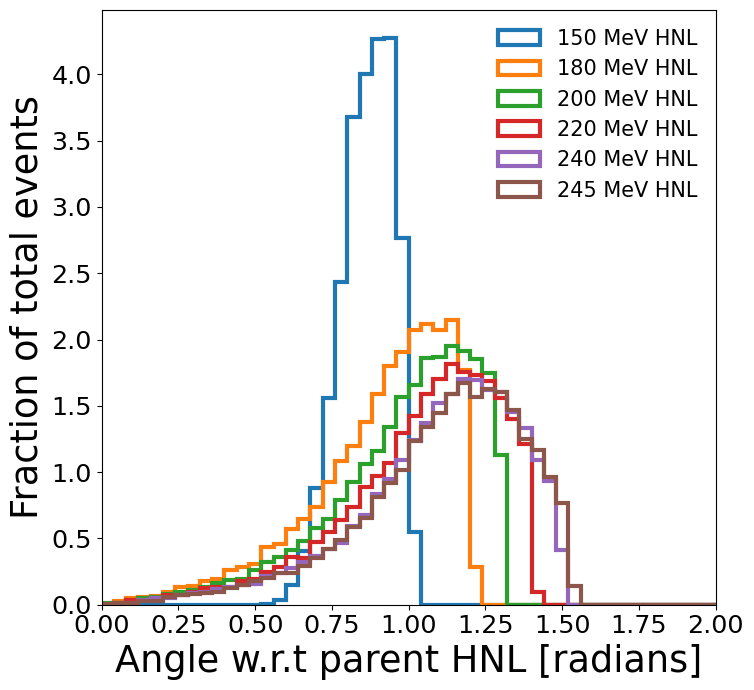

In [20]:
# Plot_variable_signal(var, HNL_samples_dict=plot_dict, xlabel=[], xlims=[0.01,0.5], bins=40, 
#                      figsize=[10,10], dpi=100, MergeBins=False, density=True,legloc="best",logy = False, cutline = None, savefig=False)

Plot_variable_signal(var, HNL_samples_dict=plot_dict, xlabel=variable_names_dict[var], xlims=[0,2], bins=50, 
                     figsize=[8,8], dpi=100, MergeBins=False, density=True,legloc="best",logy = False,
                     cutline = None, savefig=True, filename = f"pi0_dirac_{var}_{Run}")


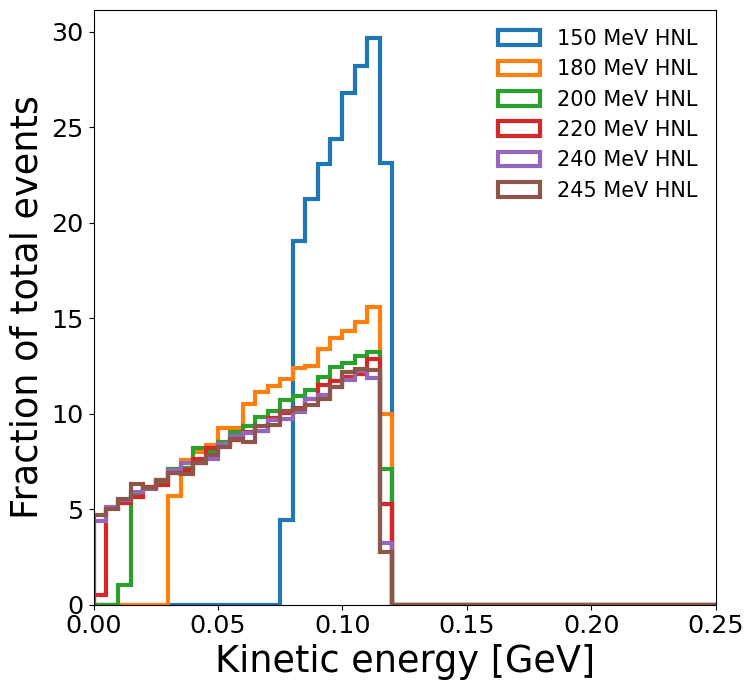

In [21]:
Plot_variable_signal(var_2, HNL_samples_dict=plot_dict_2, xlabel=variable_names_dict[var_2], xlims=[0,0.25], bins=50, 
                     figsize=[8,8], dpi=100, MergeBins=False, density=True,legloc="best",logy = False,
                     cutline = None, savefig=True, filename = f"pi0_dirac_{var_2}_{Run}")

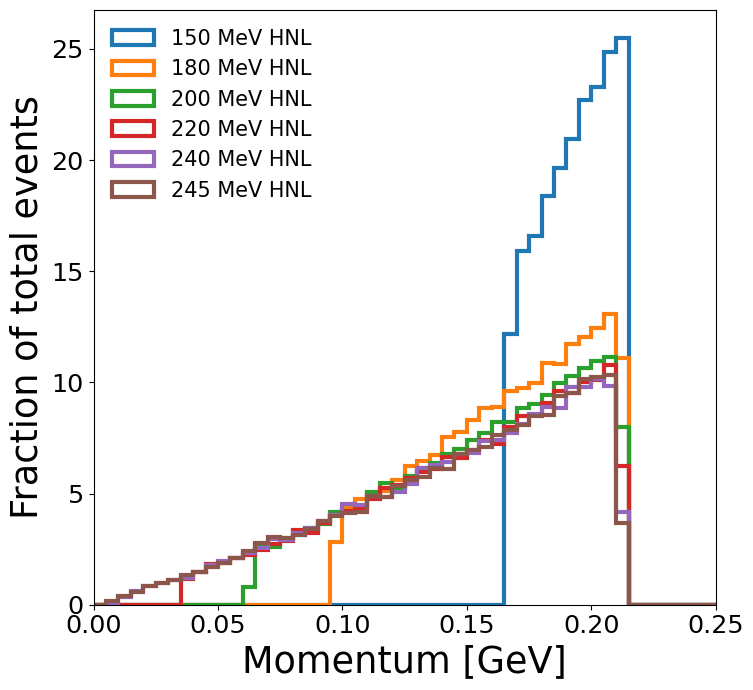

In [22]:
if load_pi0_signal == True:
    Plot_variable_signal(var_3, HNL_samples_dict=plot_dict_3, xlabel=variable_names_dict[var_3], xlims=[0,0.25], bins=50, 
                     figsize=[8,8], dpi=100, MergeBins=False, density=True,legloc="upper left",logy = False,
                     cutline = None, savefig=True, filename = f"pi0_dirac_{var_3}_{Run}")

In [ ]:
sample_dict[220].keys()

## 2D histogram of reco showers and tracks

In [ ]:
a = np.arange(5) - 0.5
print(a)
#previously [0,4]

In [ ]:
#HNL_mass = 20
savefig=True

for HNL_mass in plot_dict.keys():

    n_showers = plot_dict_2[HNL_mass]
    n_tracks = plot_dict[HNL_mass]

    width = 10
    aspect = 0.9
    height = width*aspect
    plt.figure(figsize=(width,height))
    
    BINS = np.arange(5)-0.5
    lims = [-1, 5]
    ticks = [0,1, 2, 3]
    old_bins = 4
    old_lims = [0,4]

    plt.hist2d(n_showers, n_tracks, bins = BINS, range=[lims,lims], density=True)

    counts, xedges, yedges, Image = plt.hist2d(n_showers, n_tracks, bins = BINS, range=[lims,lims], density=True)

    dx = xedges[2]-xedges[1]
    dy = yedges[2]-yedges[1]
    for i in range(xedges.size-1):
        for j in range(yedges.size-1):
            xb = xedges[i] + 0.25*dx
            yb = yedges[j] + 0.4*dy
            plt.text(xb, yb, str(np.round(100.*counts[i,j],2)), fontsize=20)

    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.title(str(HNL_mass) + " MeV HNL")
    plt.xlabel("reconstructed showers")
    plt.ylabel("reconstructed tracks")
    plt.colorbar()
    plt.tight_layout()
    if savefig==True:
        Name = f"Reconstructed_objects_{HNL_mass}MeV_{Run}"
        if Plot_only_lepton == True: plt.savefig("plots/Truth_studies/Signal_plots/" + Name + ".png")
        if Plot_only_pi0 == True: plt.savefig("plots/Truth_studies/Signal_plots/pi0/" + Name + ".png")

## Multiplicity study

In [ ]:
def Make_fraction_recod(HNL_samples_dict=signal_samples_dict, variable='n_pfps'): #This should be fed with a dict of unflattened dataframes
    frac_pfps_dict = {}
    for HNL_mass in HNL_samples_dict:
        Placeholder_list = []
        Num_events = len(HNL_samples_dict[HNL_mass][variable])
        for i in range(max(HNL_samples_dict[HNL_mass][variable])):
            selection = HNL_samples_dict[HNL_mass].loc[(HNL_samples_dict[HNL_mass][variable] == i)]
            Num_multiplicity = len(selection)
            Placeholder_list.append(Num_multiplicity/Num_events)
        frac_pfps_dict[HNL_mass] = Placeholder_list
    return frac_pfps_dict

In [ ]:
frac_pfps_dict = Make_fraction_recod(HNL_samples_dict=sample_dict, variable='n_pfps')

print(frac_pfps_dict)

In [ ]:
HNL_mass = 150
selection = sample_dict[HNL_mass].loc[(sample_dict[HNL_mass]['n_pfps'] == 2)]

print(len(selection))

# Plotting variables before preselection

In [ ]:
#Want to have arrows drawn on for where the preselection cut goes
HNL_mass = 200 #only plotting one at a time
variable = "crtveto"
samples = {"overlay":overlay_from_pkl,
           "dirtoverlay":dirt_from_pkl,
           "beamoff":EXT_from_pkl,
           "signal":signal_samples_dict[HNL_mass]}
samples.update(signal_samples_dict)
if Run == "run1":
    sample_norms = {"overlay":Constants.SF_overlay_run1,
           "dirtoverlay":Constants.SF_dirt_run1,
           "beamoff":Constants.SF_EXT_run1,
           "signal":Constants.run1_POT_scaling_dict[HNL_mass]}
elif Run == "run3":
    sample_norms = {"overlay":Constants.SF_overlay_run3,
           "dirtoverlay":Constants.SF_dirt_run3,
           "beamoff":Constants.SF_EXT_run3,
           "signal":Constants.run3_POT_scaling_dict[HNL_mass]}
    
PT.HNL_scaling_calculator(samples,sample_norms)


In [ ]:
for sample in samples:
    print(sample)

In [ ]:
PT.Plot_preselection_variable(variable, samples, sample_norms, xlabel=[],xlims=[0,2],bins=2, HNL_mass=HNL_mass,HNLplotscale=30000,cutline=1.0)
# plt.axvline(x=16.5, lw=3, color='green', linestyle = 'dashed')

#plt.savefig("plots/Preselection_variables/" + Run + "_" + str(HNL_mass) + "_MeV_" + str(variable)+".png")

## Plot only signal samples before preselection

In [ ]:
#Need a new plotting function for this
print(overlay_from_pkl.keys())
print()
print(EXT_from_pkl.keys())

# Pre-selection cuts

In [ ]:
def Preselection_weighted_efficiency(samples, cut_dict, Efficiency_dict, Preselected): #Need to account for weigthing in overlay and dirt samples
    for sample in samples:
        if sample == "overlay" or sample == "dirtoverlay":
            weight = samples[sample]["weight"]
            NumEvs = sum(weight)
        else:
            NumEvs = len(samples[sample])
        
        effic_list = [1.0]
        for cut in cut_dict.keys():
            samples[sample]=samples[sample].query(cut_dict[cut])
            if sample == "overlay" or sample == "dirtoverlay":
                weight = samples[sample]["weight"]
                Num_selected = sum(weight)
            else:
                Num_selected = len(samples[sample])
            effic_list.append(Num_selected/NumEvs)
        Efficiency_dict[sample]=effic_list
        #samples.update()
        Selected = samples[sample].copy()
        placeholder_dict = {sample:Selected}
        Preselected.update(placeholder_dict) 
    

In [ ]:
#Make cuts on signal
if Run == "run1": 
    if FLATTEN == True:
        Preselection_dict = Constants.Preselection_dict #Have also saved this in Constants.py, it is also here in case I want to add to or edit the cuts
    else:
        Preselection_dict = Constants.Preselection_dict_for_plot
elif Run == "run3":
    if FLATTEN == True:
        Preselection_dict = Constants.Preselection_dict
    else:
        Preselection_dict = Constants.Preselection_dict_for_plot
    Preselection_dict.update(Constants.Preselection_dict_crtveto) #Adding crtveto cut
    
print("Preselection is:" + "\n")
print(Preselection_dict)
print()

#"Containment":""
#"n_track":"n_track < 5"
#"shr_energy_tot":"shr_energy_tot < 1.0"
#"trk_len":"trk_len < 50.0"

#print(Signal_run1.numentries)
print("Numbers of rows in dataframes BEFORE Preselection:")
print("Overlay file has " + str(len(overlay_from_pkl)))
print("Dirt file has " + str(len(dirt_from_pkl)))
print("EXT file has " + str(len(EXT_from_pkl)))
#print(len(signal_from_pkl))



In [ ]:
#Make cuts on bkg
# Preselection_efficiency_overlay = [1.0]
# Preselection_efficiency_dirt = [1.0]
# Preselection_efficiency_EXT = [1.0]

# Preselection_signal_max = []
# Preselection_signal_min = []

# Preselection_efficiency_signal_dict = {}
# for HNL_mass in HNL_masses:
#     Preselection_efficiency_signal_dict[HNL_mass] = [1.0]

# Selected_signal_from_pkl_dict = {}

    
# Selected_overlay_from_pkl = Preselection_with_list(overlay_from_pkl, Preselection_dict, Preselection_efficiency_overlay)
# Selected_dirt_from_pkl = Preselection_with_list(dirt_from_pkl, Preselection_dict, Preselection_efficiency_dirt)
# Selected_EXT_from_pkl = Preselection_with_list(EXT_from_pkl, Preselection_dict, Preselection_efficiency_EXT)

# for HNL_mass in HNL_masses:
#     Selected_signal_from_pkl_dict[HNL_mass] = Preselection_with_list(signal_samples_dict[HNL_mass], Preselection_dict, Preselection_efficiency_signal_dict[HNL_mass])

# print("AFTER Preselection:")
# print("Overlay .pkl is "+str(len(Selected_overlay_from_pkl))+" entries long.")
# print("Dirt .pkl is "+str(len(Selected_dirt_from_pkl))+" entries long.")
# print("EXT .pkl is "+str(len(Selected_EXT_from_pkl))+" entries long.")

# for HNL_mass in HNL_masses:
#     print(f"{HNL_mass}MeV Signal .pkl is "+str(len(Selected_signal_from_pkl_dict[HNL_mass]))+" entries long.")

Efficiency_dict = {}
Preselected_dict = {}
    
Preselection_weighted_efficiency(samples, Preselection_dict, Efficiency_dict, Preselected_dict)

print(Efficiency_dict)

In [ ]:
#Working out the maximum and minimum efficiencies for signal "band"
Preselection_signal_max = []
Preselection_signal_min = []

max_presel_effic = 0.0
min_presel_effic = 1.0
# for i in range(len(Preselection_dict)+1):
#     for HNL_mass in HNL_masses:
#         if Preselection_efficiency_signal_dict[HNL_mass][i] > max_presel_effic:
#             max_presel_effic = Preselection_efficiency_signal_dict[HNL_mass][i]
#         if Preselection_efficiency_signal_dict[HNL_mass][i] < min_presel_effic:
#             min_presel_effic = Preselection_efficiency_signal_dict[HNL_mass][i]
#     Preselection_signal_max.append(max_presel_effic)
#     Preselection_signal_min.append(min_presel_effic)
#     max_presel_effic = 0.0
    
for i in range(len(Preselection_dict)+1):
    for HNL_mass in HNL_masses:
        if Efficiency_dict[HNL_mass][i] > max_presel_effic:
            max_presel_effic = Efficiency_dict[HNL_mass][i]
        if Efficiency_dict[HNL_mass][i] < min_presel_effic:
            min_presel_effic = Efficiency_dict[HNL_mass][i]
    Preselection_signal_max.append(max_presel_effic)
    Preselection_signal_min.append(min_presel_effic)
    max_presel_effic = 0.0

In [ ]:
print(Preselection_signal_max)
print(Preselection_signal_min)

# Save pkls

In [ ]:
print_vals = input("Do you want to save the pickle files? y/n ")
if print_vals == "y":
    loc_pkls = f"pkl_files/{Run}/current_files/"

    print(f"Saving {Run} Preselected overlay .pkl")
    Selected_overlay_from_pkl.to_pickle(loc_pkls+f"Preselected_overlay_{Run}_my_vars_flattened.pkl")

    print(f"Saving {Run} Preselected dirt .pkl")
    Selected_dirt_from_pkl.to_pickle(loc_pkls+f"Preselected_dirt_{Run}_my_vars_flattened.pkl")

    print(f"Saving {Run} Preselected EXT .pkl")
    Selected_EXT_from_pkl.to_pickle(loc_pkls+f"Preselected_EXT_{Run}_my_vars_flattened.pkl")
    for HNL_mass in HNL_masses:
        print(f"Saving {Run} Preselected {HNL_mass}MeV signal .pkl")
        Selected_signal_from_pkl_dict[HNL_mass].to_pickle(loc_pkls+f"Preselected_signal_{HNL_mass}MeV_{Run}_my_vars_flattened.pkl")
else:
    print("Not saving pickle files, move onto next cell")

# Plotting Efficiencies

In [ ]:
#Signal-only efficiencies
plt.figure(figsize=[10,10])
#print(Preselection_efficiency_signal_dict)
#print(len(Preselection_efficiency_signal_dict[HNL_mass]))
# for HNL_mass in HNL_masses:
#     plt.plot(np.array(range(1, len(Preselection_efficiency_signal_dict[HNL_mass])+1)), Preselection_efficiency_signal_dict[HNL_mass], label=f"{HNL_mass} MeV HNL",lw=4,markersize=15)
#plt.plot(np.array(range(1, len(Preselection_efficiency_overlay)+1)),Preselection_efficiency_signal,label="100 MeV HNL",lw=4,markersize=15)


# plt.plot(np.array(range(1, len(Preselection_efficiency_overlay)+1)),Preselection_efficiency_overlay,label=f"MC {Run} overlay",color='peru',lw=4,markersize=15)
# plt.plot(np.array(range(1, len(Preselection_efficiency_overlay)+1)),Preselection_efficiency_dirt,label=f"MC {Run} dirt",color="darkorange",lw=4,markersize=15)
# plt.plot(np.array(range(1, len(Preselection_efficiency_overlay)+1)),Preselection_efficiency_EXT,label=f"{Run} EXT",color='deepskyblue',lw=4,markersize=15)
# plt.plot(np.array(range(1, len(Preselection_efficiency_signal_dict[HNL_mass])+1)),Preselection_signal_max,color="darkred",lw=4,marker="")
# plt.plot(np.array(range(1, len(Preselection_efficiency_signal_dict[HNL_mass])+1)),Preselection_signal_min,color="darkred",lw=4,marker="")
# plt.fill_between(np.array(range(1, len(Preselection_efficiency_signal_dict[HNL_mass])+1)),Preselection_signal_min,Preselection_signal_max,label=f"Signal {Run} (Range)",color="red")
# plt.ylabel("Fraction Selected")
# plt.xticks(np.array(range(1, len(Preselection_efficiency_signal_dict[HNL_mass])+1)),["Full sample"]+list(Preselection_dict.keys()),rotation=80)
# #plt.yscale("log")
# plt.legend()

plotting_effic_dict = {'overlay':Efficiency_dict['overlay'], 'dirtoverlay':Efficiency_dict['dirtoverlay'],
                      'beamoff':Efficiency_dict['beamoff']}
plotting_effic_colours = {'overlay':'peru', 'dirtoverlay':'darkorange',
                      'beamoff':'deepskyblue'}
#, 'signal_max':Preselection_signal_max, 'signal_min':Preselection_signal_min}

log = True

if log == True:
    logscale="log"
elif log == False:
    logscale="linear"

for effic in plotting_effic_dict:
    #Efficiency_dict[effic]
    plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict[effic],label=f"{Run} {effic}",color=plotting_effic_colours[effic],lw=4,markersize=15)

plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Preselection_signal_max,color="darkred",lw=4,marker="")
plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Preselection_signal_min,color="darkred",lw=4,marker="")
plt.fill_between(np.array(range(1, len(Efficiency_dict[effic])+1)),Preselection_signal_min,Preselection_signal_max,label=f"Signal {Run} (Range)",color="red")
plt.ylabel("Fraction Selected")
plt.xticks(np.array(range(1, len(Efficiency_dict['overlay'])+1)),["Full sample"]+list(Preselection_dict.keys()),rotation=80)
plt.yscale(logscale)
plt.legend()

save_fig = input("Do you want to save the figure? y/n ")

if save_fig == 'y':
    plt.savefig("plots/Preselection_efficiencies/" + Run + "_" + Flat_state + "_" + logscale + ".png")

In [ ]:
#Plotting efficiency
plt.figure(figsize=[10,10])
plt.plot(np.array(range(1, len(Preselection_efficiency_signal)+1)),Preselection_efficiency_signal,label="100 MeV HNL",lw=4,markersize=15)
plt.plot(np.array(range(1, len(Preselection_efficiency_signal)+1)),Preselection_efficiency_overlay,label="MC run1 overlay",lw=4,markersize=15)
plt.plot(np.array(range(1, len(Preselection_efficiency_signal)+1)),Preselection_efficiency_dirt,label="MC run1 dirt",lw=4,markersize=15)
plt.plot(np.array(range(1, len(Preselection_efficiency_signal)+1)),Preselection_efficiency_EXT,label="MC run1 EXT",lw=4,markersize=15)
plt.ylabel("Fraction Selected")
plt.xticks(np.array(range(1, len(Preselection_efficiency_signal)+1)),["Full sample"]+list(Preselection_dict.keys()),rotation=80)
#plt.yscale("log")
plt.legend()

print(Preselection_efficiency_signal)


# Testing code

In [ ]:
#Testing what the variables look like
variable = "dvtx_x_boundary"
def test_variables(df):
    test_signal = df[variable]
    print(type(test_signal))
    print(len(test_signal))
test_variables(df_overlay_run1)
test_variables(df_dirt_run1)
test_variables(df_EXT_run1)
test_variables(df_signal_run1)

In [ ]:
#Single variables
plt.rcParams.update({'font.size': 22})

plot_variable = "n_showers"
range_list=[0,10]

Plot_one_variable(df_signal_run1, df_overlay_run1, plot_variable, 10, range_list, False) #With range
#Plot_one_variable(df_signal_run1, df_NuMI_MC_overlay_pdra_run1, plot_variable, None, loghist=False) #Without range

In [ ]:
#print(overlay_from_pkl['nslice'])
#print("Flat Overlay .pkl is "+str(len(FLAT_overlay_from_pkl))+" entries long.")

print("-----Unflattened-----")
unique_var = overlay_from_pkl["nslice"].unique()
print(unique_var)
unique_var = overlay_from_pkl["n_pfps"].unique()
print(unique_var)
print(overlay_from_pkl["n_pfps"])
print(type(overlay_from_pkl["n_pfps"][0]))

# for var in overlay_from_pkl.keys():
#     if type(overlay_from_pkl[var][1]) == "numpy.ndarray":
#         print(var)

# print("-----Flattened-----")
# unique_var = FLAT_overlay_from_pkl["nslice"].unique()
# print(unique_var)
# unique_var = FLAT_overlay_from_pkl["n_pfps"].unique()
# print(unique_var)
# print(FLAT_overlay_from_pkl["n_pfps"])
# print(type(FLAT_overlay_from_pkl["n_pfps"]))